In [1]:
import torch
import librosa
import pandas as pd
import numpy as np
from parselmouth import Sound
from pathlib import Path

from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

from tqdm.auto import tqdm
import matplotlib.pyplot as plt

import pickle

/vol/tensusers3/jdusseljee/2324-asr/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
features = pd.read_csv('datasets/addresso/train/features.csv').sort_values(by='ID')

original_svm = pd.read_csv('jen_original_transcript/pred_df_svm.csv').sort_values(by='ID')
original_xgboost = pd.read_csv('jen_original_transcript/pred_df_xgboost.csv').sort_values(by='ID')
original_bert = pd.read_csv('jen_original_transcript/pred_df_bert.csv')

whisper_svm = pd.read_csv('jen_whisper/pred_df_svm.csv').sort_values(by='ID')
whisper_xgboost = pd.read_csv('jen_whisper/pred_df_xgboost.csv').sort_values(by='ID')
whisper_bert = pd.read_csv('jen_whisper/pred_df_bert.csv')

whisper_medical_svm = pd.read_csv('jen_whisper_medical/pred_df_svm.csv').sort_values(by='ID')
whisper_medical_xgboost = pd.read_csv('jen_whisper_medical/pred_df_xgboost.csv').sort_values(by='ID')
whisper_medical_bert = pd.read_csv('jen_whisper_medical/pred_df_bert.csv')

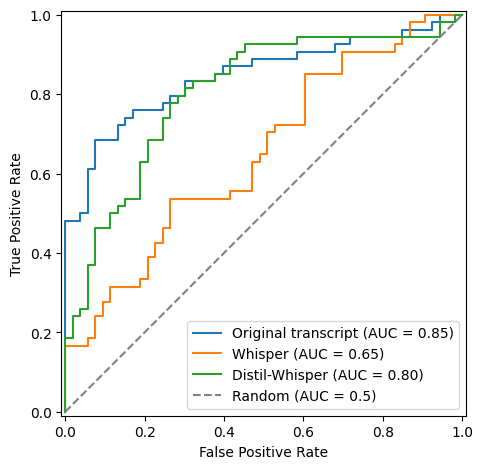

In [3]:
fpr_original, tpr_original, _ = roc_curve(original_svm['class'], original_svm['pred'])
fpr_whisper, tpr_whisper, _ = roc_curve(whisper_svm['class'], whisper_svm['pred'])
fpr_whisper_med, tpr_whisper_med, _ = roc_curve(whisper_medical_svm['class'], whisper_medical_svm['pred'])

display = RocCurveDisplay(fpr=fpr_original, tpr=tpr_original, roc_auc=roc_auc_score(original_svm['class'], original_svm['pred']), estimator_name='Original transcript')
display.plot()

ax = plt.gca()

display_whisper = RocCurveDisplay(fpr=fpr_whisper, tpr=tpr_whisper, roc_auc=roc_auc_score(whisper_svm['class'], whisper_svm['pred']), estimator_name='Whisper')
display_whisper.plot(ax)

display_whisper_med = RocCurveDisplay(fpr=fpr_whisper_med, tpr=tpr_whisper_med, roc_auc=roc_auc_score(whisper_medical_svm['class'], whisper_medical_svm['pred']), estimator_name='Distil-Whisper')
display_whisper_med.plot(ax)

# Add AUC = 0.5 line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random (AUC = 0.5)')

plt.tight_layout()
# Show the plot with legend
plt.legend()
plt.show()

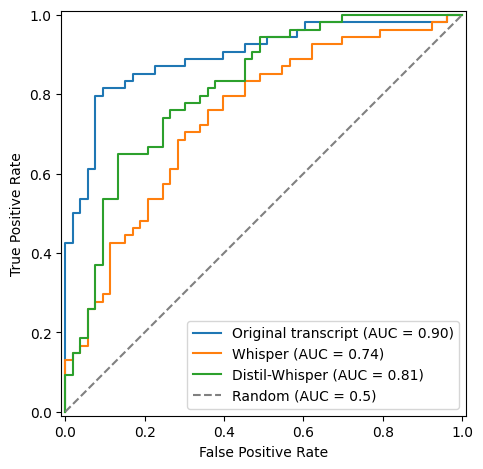

In [4]:
fpr_original, tpr_original, _ = roc_curve(original_xgboost['class'], original_xgboost['pred'])
fpr_whisper, tpr_whisper, _ = roc_curve(whisper_xgboost['class'], whisper_xgboost['pred'])
fpr_whisper_med, tpr_whisper_med, _ = roc_curve(whisper_medical_xgboost['class'], whisper_medical_xgboost['pred'])

display = RocCurveDisplay(fpr=fpr_original, tpr=tpr_original, roc_auc=roc_auc_score(original_xgboost['class'], original_xgboost['pred']), estimator_name='Original transcript')
display.plot()

ax = plt.gca()

display_whisper = RocCurveDisplay(fpr=fpr_whisper, tpr=tpr_whisper, roc_auc=roc_auc_score(whisper_xgboost['class'], whisper_xgboost['pred']), estimator_name='Whisper')
display_whisper.plot(ax)

display_whisper_med = RocCurveDisplay(fpr=fpr_whisper_med, tpr=tpr_whisper_med, roc_auc=roc_auc_score(whisper_medical_xgboost['class'], whisper_medical_xgboost['pred']), estimator_name='Distil-Whisper')
display_whisper_med.plot(ax)

# Add AUC = 0.5 line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random (AUC = 0.5)')

plt.tight_layout()

# Show the plot with legend
plt.legend()
plt.show()

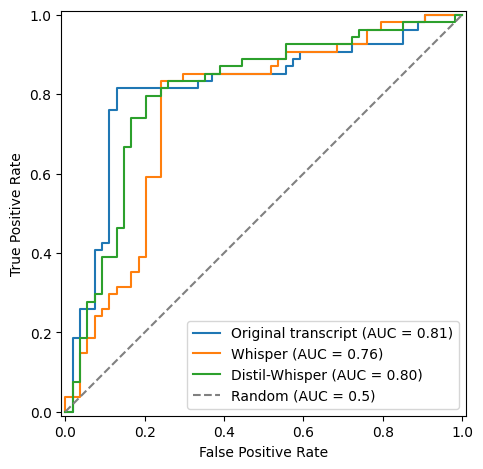

In [5]:
fpr_original, tpr_original, _ = roc_curve(features['class'], original_bert['pred'])
fpr_whisper, tpr_whisper, _ = roc_curve(features['class'], whisper_bert['pred'])
fpr_whisper_med, tpr_whisper_med, _ = roc_curve(features['class'], whisper_medical_bert['pred'])

display = RocCurveDisplay(fpr=fpr_original, tpr=tpr_original, roc_auc=roc_auc_score(features['class'], original_bert['pred']), estimator_name='Original transcript')
display.plot()

ax = plt.gca()

display_whisper = RocCurveDisplay(fpr=fpr_whisper, tpr=tpr_whisper, roc_auc=roc_auc_score(features['class'], whisper_bert['pred']), estimator_name='Whisper')
display_whisper.plot(ax)

display_whisper_med = RocCurveDisplay(fpr=fpr_whisper_med, tpr=tpr_whisper_med, roc_auc=roc_auc_score(features['class'], whisper_medical_bert['pred']), estimator_name='Distil-Whisper')
display_whisper_med.plot(ax)

# Add AUC = 0.5 line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random (AUC = 0.5)')

plt.tight_layout()

# Show the plot with legend
plt.legend()
plt.show()

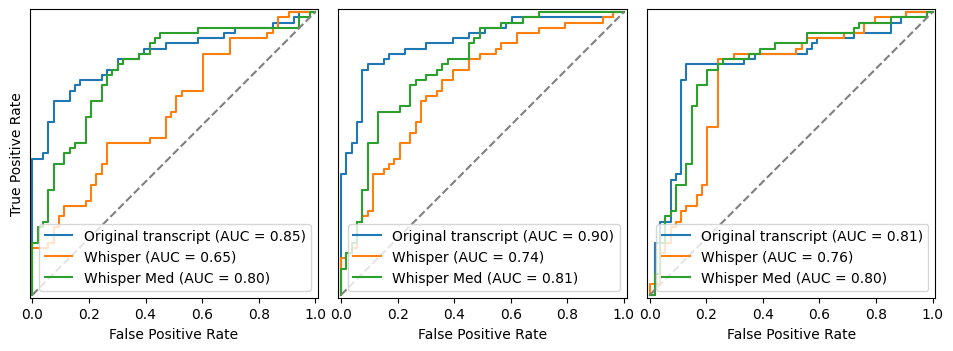

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10,30))

fpr_original, tpr_original, _ = roc_curve(original_svm['class'], original_svm['pred'])
fpr_whisper, tpr_whisper, _ = roc_curve(whisper_svm['class'], whisper_svm['pred'])
fpr_whisper_med, tpr_whisper_med, _ = roc_curve(whisper_medical_svm['class'], whisper_medical_svm['pred'])

display = RocCurveDisplay(fpr=fpr_original, tpr=tpr_original, roc_auc=roc_auc_score(original_svm['class'], original_svm['pred']), estimator_name='Original transcript')
display.plot(axes[0])

display_whisper = RocCurveDisplay(fpr=fpr_whisper, tpr=tpr_whisper, roc_auc=roc_auc_score(whisper_svm['class'], whisper_svm['pred']), estimator_name='Whisper')
display_whisper.plot(axes[0])

display_whisper_med = RocCurveDisplay(fpr=fpr_whisper_med, tpr=tpr_whisper_med, roc_auc=roc_auc_score(whisper_medical_svm['class'], whisper_medical_svm['pred']), estimator_name='Whisper Med')
display_whisper_med.plot(axes[0])

axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random (AUC = 0.5)')



fpr_original, tpr_original, _ = roc_curve(original_xgboost['class'], original_xgboost['pred'])
fpr_whisper, tpr_whisper, _ = roc_curve(whisper_xgboost['class'], whisper_xgboost['pred'])
fpr_whisper_med, tpr_whisper_med, _ = roc_curve(whisper_medical_xgboost['class'], whisper_medical_xgboost['pred'])

display = RocCurveDisplay(fpr=fpr_original, tpr=tpr_original, roc_auc=roc_auc_score(original_xgboost['class'], original_xgboost['pred']), estimator_name='Original transcript')
display.plot(axes[1])

display_whisper = RocCurveDisplay(fpr=fpr_whisper, tpr=tpr_whisper, roc_auc=roc_auc_score(whisper_xgboost['class'], whisper_xgboost['pred']), estimator_name='Whisper')
display_whisper.plot(axes[1])

display_whisper_med = RocCurveDisplay(fpr=fpr_whisper_med, tpr=tpr_whisper_med, roc_auc=roc_auc_score(whisper_medical_xgboost['class'], whisper_medical_xgboost['pred']), estimator_name='Whisper Med')
display_whisper_med.plot(axes[1])

axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random (AUC = 0.5)')
axes[1].set_ylabel("")
axes[1].sharey(axes[0])


fpr_original, tpr_original, _ = roc_curve(features['class'], original_bert['pred'])
fpr_whisper, tpr_whisper, _ = roc_curve(features['class'], whisper_bert['pred'])
fpr_whisper_med, tpr_whisper_med, _ = roc_curve(features['class'], whisper_medical_bert['pred'])

display = RocCurveDisplay(fpr=fpr_original, tpr=tpr_original, roc_auc=roc_auc_score(features['class'], original_bert['pred']), estimator_name='Original transcript')
display.plot(axes[2])

display_whisper = RocCurveDisplay(fpr=fpr_whisper, tpr=tpr_whisper, roc_auc=roc_auc_score(features['class'], whisper_bert['pred']), estimator_name='Whisper')
display_whisper.plot(axes[2])

display_whisper_med = RocCurveDisplay(fpr=fpr_whisper_med, tpr=tpr_whisper_med, roc_auc=roc_auc_score(features['class'], whisper_medical_bert['pred']), estimator_name='Whisper Med')
display_whisper_med.plot(axes[2])

axes[2].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random (AUC = 0.5)')
axes[2].set_ylabel("")
axes[2].sharey(axes[1])

# axes[1].set_yticks([])
# axes[1].set_yticklabels([])
axes[2].set_yticks([])
# axes[2].set_yticklabels([])

plt.tight_layout()
plt.subplots_adjust(wspace=.07, hspace=0)

# plt.tight_layout()
# fig.legend()
plt.show()